In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import os
import re
import copy
import json

In [2]:

from chessboard_utils import *




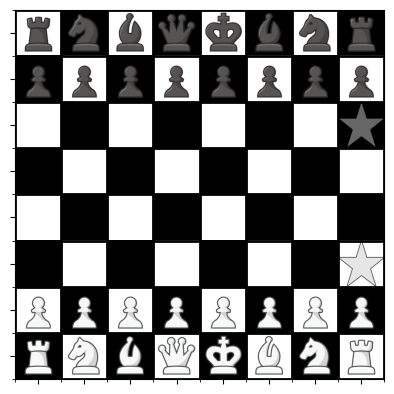

In [3]:
game_state = np.array([
    [-2, -3, -4, -6, -5, -4, -3, -2],
    [-1, -1, -1, -1, -1, -1, -1, -1],
    [ 0,  0,  0,  0,  0,  0,  0,  -7],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  7],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 2,  3,  4,  6,  5,  4,  3,  2],
])

    
draw_chessboard(game_state, show=True)


In [4]:
from movement_analysis import *

from actualize_game_state import *


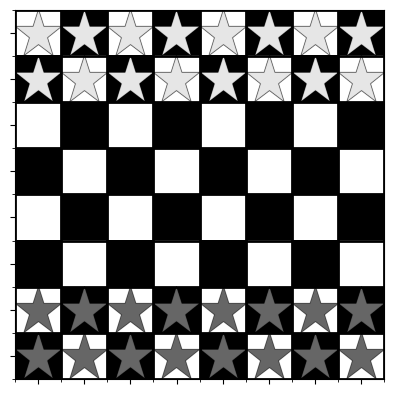


##############################################

Game state 0 (Frame: warped_frame_000100.png):
Change positions []
Invalid move: No changes detected

##############################################

Game state 1 (Frame: warped_frame_000150.png):
Change positions []
Invalid move: No changes detected

##############################################

Game state 2 (Frame: warped_frame_000200.png):
Change positions [(0, 6)]
Invalid move: Only 1 change so its an error

##############################################

Game state 3 (Frame: warped_frame_000250.png):
Change positions [(1, 5), (2, 3)]
MOVEMENT ANALYSIS
valid_movements []
Invalid move: Unrecognized move pattern

##############################################

Game state 4 (Frame: warped_frame_000300.png):
Change positions [(0, 1), (0, 3), (1, 0), (1, 2), (1, 3), (1, 6), (2, 3), (2, 5), (2, 6), (2, 7), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7)]
Invalid move: Too much positions changed

##############################################

Gam

KeyError: 'piece_certainty'

In [5]:


# Read the game states from game_state.json
with open('game_state.json', 'r') as f:
    game_data = json.load(f)


last_game_state = game_data['game_states'][0]['gs']

last_game_state = np.fliplr(last_game_state.copy())

actualized_game_state = {}

draw_chessboard(last_game_state, show=True)

potential_castling = None

actualized_game_state = initialize_game_state(last_game_state)


# Display each game state
for i, state in enumerate(game_data['game_states'][1:]):

    print('\n##############################################')
    print(f"\nGame state {i} (Frame: {state['frame']}):")
    # valid_move = True
    
    curr_state = np.array(state['gs'])

    # prev_state = np.fliplr(prev_state.copy())
    curr_state = np.fliplr(curr_state.copy())

    move_analysis, potential_castling = analyze_move(last_game_state, curr_state, potential_castling, actualized_game_state)

    valid_move = move_analysis['valid']
    
    if move_analysis['valid']:

        if move_analysis['move_type'] != 'castling' and move_analysis['error_pos'] is not None:

            error_pos = move_analysis['error_pos']
            print('Correct error position : ', error_pos)
            curr_state[error_pos] = last_game_state[error_pos]


        last_game_state = curr_state.copy()


        if move_analysis['move_type'] == 'castling':

            new_game_state, board, piece_certainty = actualize_game_state_with_castling(actualized_game_state, move_analysis, curr_state)

        else:


            new_game_state, board, piece_certainty = actualize_game_state(actualized_game_state, move_analysis, curr_state)

            
            from_pos = move_analysis['from_pos']
            to_pos = move_analysis['to_pos']
            piece = move_analysis['piece']

            valid_pices = move_analysis['valid_pieces']
            
            # Convertir les positions en notation d'échecs
            from_square = f"{chr(97 + from_pos[1])}{8 - from_pos[0]}"
            to_square = f"{chr(97 + to_pos[1])}{8 - to_pos[0]}"
            
            if move_analysis['move_type'] == 'move':

                print(f"Move: {from_square} -> {to_square}")
            
            else:  # capture
                print(f"Capture: {from_square} x {to_square}")


        print(piece_certainty)
        draw_chessboard(board, show=True)

        
    else:
        print(f"Invalid move: {move_analysis['message']}")
